### Here we filter (and analyse?) the geoplant dataset

We would like to then use this dataset to test the models predictions 

In [3]:
#PO Data
import pandas as pd

po_path = "embeddings_data_and_dictionaries/geoplant/PO_metadata_train.csv"

po_data= pd.read_csv(po_path)
po_data.columns


Index(['publisher', 'year', 'month', 'day', 'lat', 'lon', 'geoUncertaintyInM',
       'taxonRank', 'date', 'dayOfYear', 'speciesId', 'surveyId', 'region',
       'county', 'district'],
      dtype='object')

region
ATLANTIC         1670751
CONTINENTAL      1516041
MEDITERRANEAN     690590
ALPINE            566090
BOREAL            499637
PANNONIAN          27254
BLACK SEA           1189
ARCTIC               780
STEPPIC              465
OUTSIDE                1
Name: count, dtype: int64

### Information about the iNaturalist dataset



In [ ]:
import pandas as pd

with open("embeddings_data_and_dictionaries/data_inaturalist/occurrence.txt") as f:
    for i, line in enumerate(f, start=1):
        if i == 2:  # first data row
            print(len(line.rstrip("\n").split("\t")))
            break

occurences=pd.read_csv("embeddings_data_and_dictionaries/data_inaturalist/occurrence.txt", sep="\t", on_bad_lines='skip', nrows=0)
col_list=list(occurences.columns)
#print(col_list)
print(col_list[98])


230
['gbifID', 'accessRights', 'bibliographicCitation', 'language', 'license', 'modified', 'publisher', 'references', 'rightsHolder', 'type', 'institutionID', 'collectionID', 'datasetID', 'institutionCode', 'collectionCode', 'datasetName', 'ownerInstitutionCode', 'basisOfRecord', 'informationWithheld', 'dataGeneralizations', 'dynamicProperties', 'occurrenceID', 'catalogNumber', 'recordNumber', 'recordedBy', 'recordedByID', 'individualCount', 'organismQuantity', 'organismQuantityType', 'sex', 'lifeStage', 'reproductiveCondition', 'caste', 'behavior', 'vitality', 'establishmentMeans', 'degreeOfEstablishment', 'pathway', 'georeferenceVerificationStatus', 'occurrenceStatus', 'preparations', 'disposition', 'associatedOccurrences', 'associatedReferences', 'associatedSequences', 'associatedTaxa', 'otherCatalogNumbers', 'occurrenceRemarks', 'organismID', 'organismName', 'organismScope', 'associatedOrganisms', 'previousIdentifications', 'organismRemarks', 'materialEntityID', 'materialEntityRema

### Code for the interpretation of the sweep results

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option("display.expand_frame_repr", False)
#Get a clean run_name:
df=pd.read_csv("results/results_geoplant.csv")
df["run_name_clean"] = df["run_name"].str.replace(
    r"_(mushrooms|plants|arthropods).*",
    "",
    regex=True
)

df.to_csv("results_geoplant_clean.csv", index=False)

FileNotFoundError: [Errno 2] No such file or directory: 'results_geoplant.csv'

In [1]:
df=pd.read_csv("results_geoplant_clean.csv")

#For wich ones linear model does worse? 
small_PR = df[df["auc_emb_PR"] < df["auc_emb_MLP"]]
print(small_PR["run_name"].tolist())
print(small_PR.value_counts("model_name"))

NameError: name 'pd' is not defined

20 out of 24 classifier, 0 for contrastive.
Contrastive succeeds at "making the space linear" in that sense

In [ ]:

get_highest(df) #so plants
get_highest(df[df["dataset"]=="arthropods"])
get_highest(df[df["dataset"]=="mushrooms"])


test=df[df["dataset"]!="plants"]
print(test.sort_values(by="auc_emb_PR", ascending= False))



#dataset
filtered=df[df["model_name"]=="contrastive"]
filtered=filtered[filtered["drop_high_freq"]==False]
quick_plot( filtered,"dataset","auc_emb_PR","bar",title="Mean AUC per dataset (contrastive models only)")
quick_plot(df, "dataset","auc_emb_PR","bar",title="Mean AUC per dataset (all models)")


NameError: name 'df' is not defined

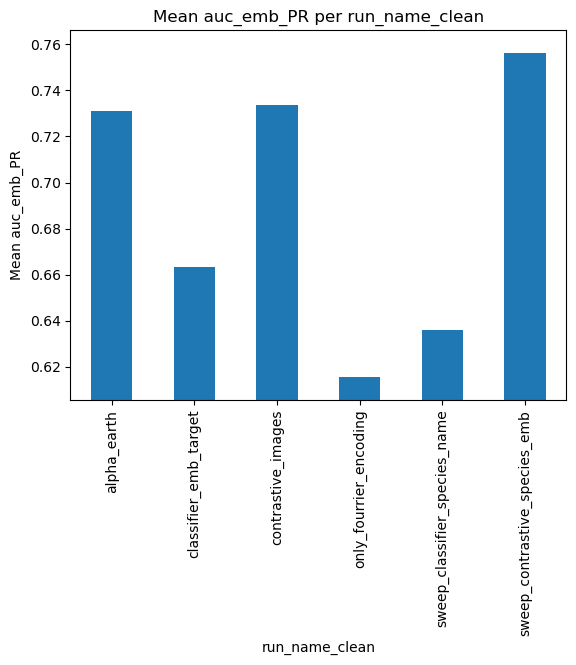

drop_high_freq
False    0.731209
True     0.751119
Name: auc_emb_PR, dtype: float64
vectors_name
vectors            0.756180
vectors_bioclip    0.742215
vectors_dino       0.725097
Name: auc_emb_PR, dtype: float64
use_species
False    0.733656
True     0.756180
Name: auc_emb_PR, dtype: float64


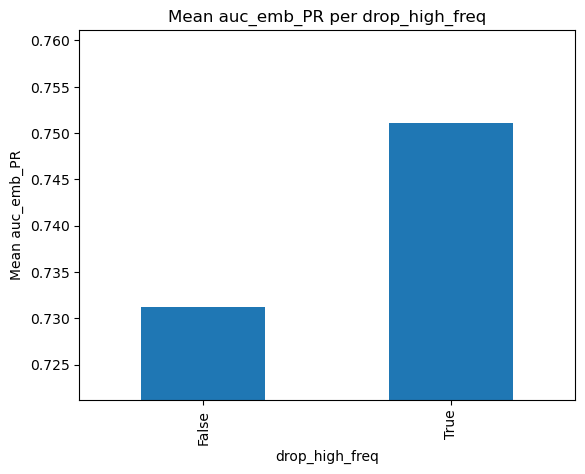

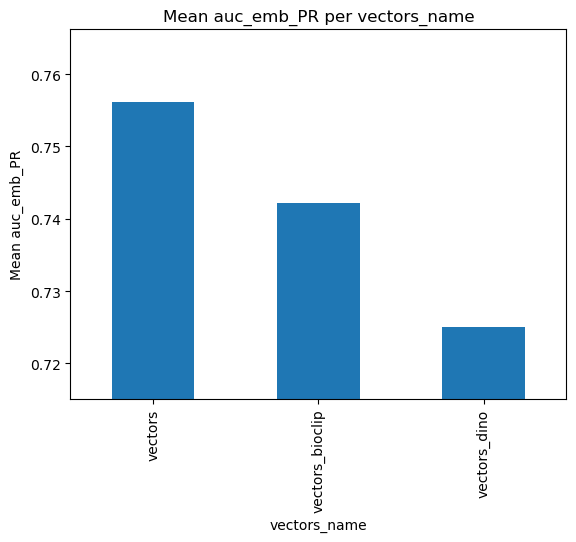

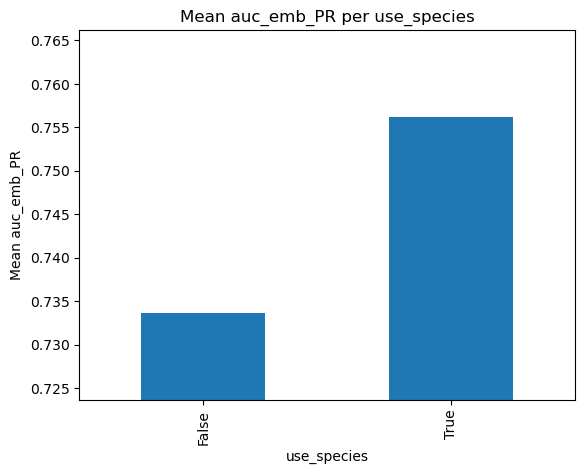

In [7]:
#Specific variable on contrastive:
quick_plot( df,"run_name_clean","auc_emb_PR","bar")


filtered=df[df["model_name"]=="contrastive"]
print(get_fct( "drop_high_freq","auc_emb_PR",filtered))
print(get_fct( "vectors_name","auc_emb_PR",filtered))
print(get_fct( "use_species","auc_emb_PR",filtered)) 

quick_plot( filtered,"drop_high_freq","auc_emb_PR","bar")
quick_plot( filtered,"vectors_name","auc_emb_PR","bar")
quick_plot( filtered,"use_species","auc_emb_PR","bar")


In [ ]:




filtered=quick_filter(df,
                      show_alpha_earth=True,
                      drop_high_freq=True,
                      dataset="plants", #"arthropods",
                      vectors_name=None,#["vectors_bioclip","vectors"],
                      model_name="contrastive",
                      use_species=None
                      )
quick_plot(filtered, "vectors_name",kind="bar",title="Mean AUC for vector type")
print(filtered)

NameError: name 'df' is not defined

For the filters 
drop_high_freq=True Or False,
model_name="contrastive", The performance on AUC is species > bioclip >dino for plants and arthropods.
The mushroom,drop_high_freq=True case is "won" by bioclip, by 0.01 auc (0.756). It might be underfitted? (A:No)



In [ ]:
import pandas as pd

# Load CSV
df = pd.read_csv("results_geoplant_clean.csv")
filtered=quick_filter(df,
                      show_alpha_earth=False,
                      drop_high_freq=None,
                      dataset=None, #"arthropods",
                      vectors_name=None,#["vectors_bioclip","vectors"],
                      model_name="contrastive",
                      use_species=None
                      )
# Define what makes a model identical except drop_high_freq
group_cols = [
    "dataset",
    "vectors_name",
    "model_name",
    "use_species",
    "run_name_clean"
]

# Pivot so True / False become columns
pivot = df.pivot_table(
    index=group_cols,
    columns="drop_high_freq",
    values=["auc_emb_PR", "auc_emb_MLP"]
)

# Rename columns for clarity
pivot.columns = [f"{metric}_drop_{flag}" for metric, flag in pivot.columns]
pivot = pivot.reset_index()

# Compare performances
pivot["PR_better_with_drop"] = pivot["auc_emb_PR_drop_True"] > pivot["auc_emb_PR_drop_False"]
pivot["MLP_better_with_drop"] = pivot["auc_emb_MLP_drop_True"] > pivot["auc_emb_MLP_drop_False"]

pivot[pivot["PR_better_with_drop"]==False]

### Mixed embeddings: species + images

                                             run_name drop_high_freq  \
0        sweep_mixed_embeddings_mushrooms_concatenate           True   
1   sweep_mixed_embeddings_mushrooms_concatenate_d...           True   
2   sweep_mixed_embeddings_plants_concatenate_diff...           True   
3        sweep_mixed_embeddings_arthropods_difference           True   
4       sweep_mixed_embeddings_arthropods_concatenate           True   
5               sweep_mixed_embeddings_arthropods_sum           True   
6   sweep_mixed_embeddings_arthropods_concatenate_...           True   
7         sweep_mixed_embeddings_mushrooms_difference           True   
8            sweep_mixed_embeddings_plants_difference           True   
9                   sweep_mixed_embeddings_plants_sum           True   
10          sweep_mixed_embeddings_plants_concatenate           True   
11               sweep_mixed_embeddings_mushrooms_sum           True   
12  contrastive_images_plants_vectors_bioclip_drop...           

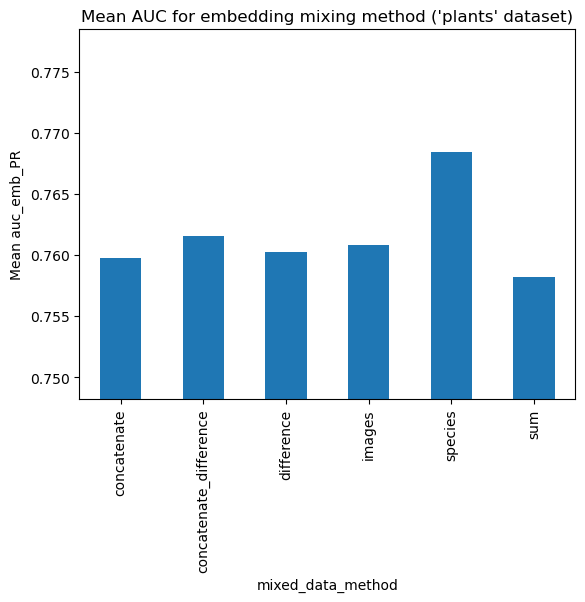

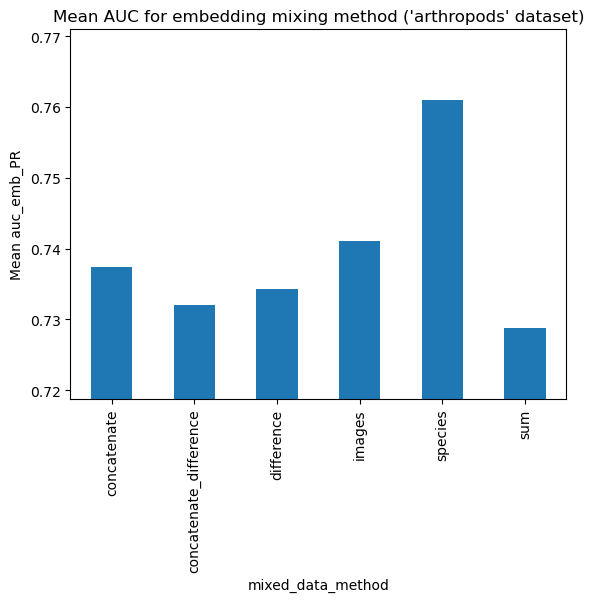

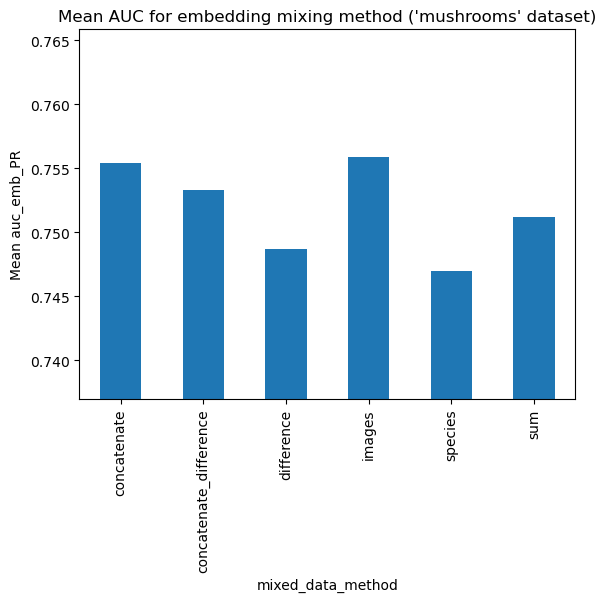

                                            run_name drop_high_freq  \
0       sweep_mixed_embeddings_mushrooms_concatenate           True   
1  sweep_mixed_embeddings_mushrooms_concatenate_d...           True   
2        sweep_mixed_embeddings_mushrooms_difference           True   
3               sweep_mixed_embeddings_mushrooms_sum           True   
4  contrastive_images_mushrooms_vectors_bioclip_d...           True   
5  sweep_contrastive_species_emb_mushrooms_drop_h...           True   

     dataset     vectors_name   model_name use_species  \
0  mushrooms  vectors_bioclip  contrastive       False   
1  mushrooms  vectors_bioclip  contrastive       False   
2  mushrooms  vectors_bioclip  contrastive       False   
3  mushrooms  vectors_bioclip  contrastive       False   
4  mushrooms  vectors_bioclip  contrastive       False   
5  mushrooms          vectors  contrastive        True   

                  run_name_clean       mixed_data_method mixed_embeddings  \
0         sweep_mi

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import pd_utils
df_mixed=pd.read_csv("results/results_mixed.csv")
df_others=pd.read_csv("results/results_geoplant_clean.csv")
#image df filtering
df_images=df_others[df_others["run_name_clean"]=="contrastive_images"]
df_images=df_images[df_images["vectors_name"]=="vectors_bioclip"]
df_images=df_images[df_images["drop_high_freq"]]
#species df filtering
df_species=df_others[df_others["run_name_clean"]=="sweep_contrastive_species_emb"]
df_species=df_species[df_species["drop_high_freq"]]
#concatenate images, label it
df_step1=pd.concat([df_mixed,df_images],ignore_index=True)
df_step1["mixed_data_method"]=df_step1["mixed_data_method"].fillna("images")  #get the right mixed_data_method name
#concatenate species, label it
df_full=pd.concat([df_step1,df_species],ignore_index=True)
df_full["mixed_data_method"]=df_full["mixed_data_method"].fillna("species")  #get the right mixed_data_method name
print(df_full)

for i,dataset in enumerate(["plants", "arthropods", "mushrooms"]):
    filtered=pd_utils.quick_filter(df_full,
                      show_alpha_earth=True,
                      drop_high_freq=True,
                      dataset=dataset, #"arthropods",
                      vectors_name=None,#["vectors_bioclip","vectors"],
                      model_name="contrastive",
                      use_species=None,
                    )
    pd_utils.quick_plot(filtered, "mixed_data_method",kind="bar",title=f"Mean AUC for embedding mixing method ('{dataset}' dataset)")
print(filtered)